In [1]:
import calendar
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url

In [2]:
def get_mean_rating_for_month(data, month):
    """Get the mean rating for the given month
    
    Args:
        data (dataframe): contains review data
        
    Returns:
        mean_rating (float): mean rating for the month
    """
    
    mean_rating = data.loc[data['month'] == month, 'rating'].mean()
    return mean_rating

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [4]:
review_query = '''
    SELECT *
    FROM reviews;
'''

review_data = pd.read_sql(review_query, connection)

In [5]:
display(review_data.head(3))

print("Shape:", review_data.shape)
print("\nColumns:", review_data.columns.values)
print("\nColumns with missing values:\n", review_data.isna().any(), sep='')

ratings = review_data['rating']
print("\nDescriptive Statistics for Rating:\n", ratings.describe(), sep='')

datetime_created = review_data['datetime_created']
print("\nDatetime Created: {} to {}".format(datetime_created.min(), datetime_created.max()))

,user_id,review,rating,version,datetime_created
0,Eleanor Abigail Darryko,This game is pretty great. The rest of the adv...,5,0.9.7 (150719),2020-06-27 21:59:56
1,Noel Tulip,I love this game it's filled with adventure an...,5,0.9.5 (150178),2020-06-27 21:54:23
2,ikan ayu,This game is beutiful,5,0.9.7 (150719),2020-06-27 21:37:36


Shape: (20000, 5)

Columns: ['user_id' 'review' 'rating' 'version' 'datetime_created']

Columns with missing values:
user_id             False
review              False
rating              False
version              True
datetime_created    False
dtype: bool

Descriptive Statistics for Rating:
count    20000.000000
mean         4.500800
std          1.044775
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Datetime Created: 2020-04-10 23:06:39 to 2020-06-27 21:59:56


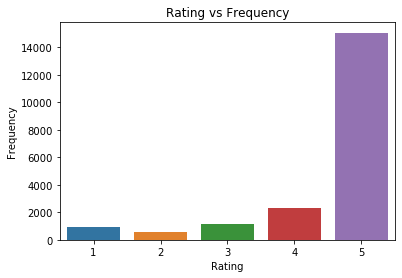

Rating and Frequency:
5    15059
4     2330
3     1119
1      940
2      552
Name: rating, dtype: int64


In [6]:
rating_countplot = sns.countplot(x='rating', data=review_data)
rating_countplot.set(
    title='Rating vs Frequency',
    xlabel='Rating',
    ylabel='Frequency'
)
plt.show()

print("Rating and Frequency:\n", review_data['rating'].value_counts(), sep='')

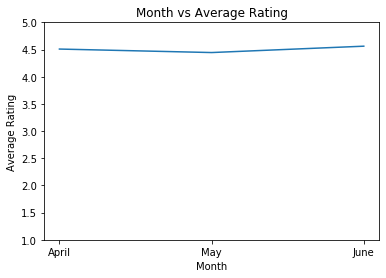

,month,mean_rating
0,April,4.508805
1,May,4.444655
2,June,4.561653


In [25]:
# .dt.strftime('%B') returns month as a string but results in different order
review_data['month'] = datetime_created.dt.month 

month_numbers = review_data['month'].sort_values().unique()
mean_ratings = [
    get_mean_rating_for_month(review_data, month_number) 
    for month_number in month_numbers
]
month_names = [
    calendar.month_name[month_number] 
    for month_number in month_numbers
]

mean_monthly_rating_plot = sns.lineplot(
    x=month_names, 
    y=mean_ratings, 
    sort=False
)
mean_monthly_rating_plot.set(
    title='Month vs Average Rating',
    xlabel='Month',
    ylabel='Average Rating'
)
plt.ylim(1, 5) # misleading without limits
plt.show()

pd.DataFrame(
    data=zip(month_names, mean_ratings), 
    columns=['month', 'mean_rating']
)

Similar means among the sample, below true mean of 4.7 stars in the Google Play Store.

In [ ]:
connection.close()
engine.dispose()